In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

init_values = pd.read_excel("init_values.xlsx", index_col=0)
X0_vals = init_values["initial values"].values
var_names = init_values.index.values

X0 = X0_vals.copy().astype(float)
print(X0)

[0.05529279 0.         0.         0.03122052 0.02246653 0.01971234
 0.02004731 0.02056367 0.0213875  0.04579232 0.04167324 0.03820651
 0.03740859 0.03725013 0.03738143]


In [12]:
X0[0] = np.log(X0[0])  # log(FX)

In [16]:
covariance_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)
Sigma = covariance_matrix.values

# Set up parameters for simulation
dt = 1/52
T = 52  # number of weeks in a year
mu = np.zeros(len(X0))
mu[1] = 0.07 * dt
mu[2] = 0.06 * dt

In [17]:
idx_5y_eur = np.where(var_names == "5Y EUR")[0][0]

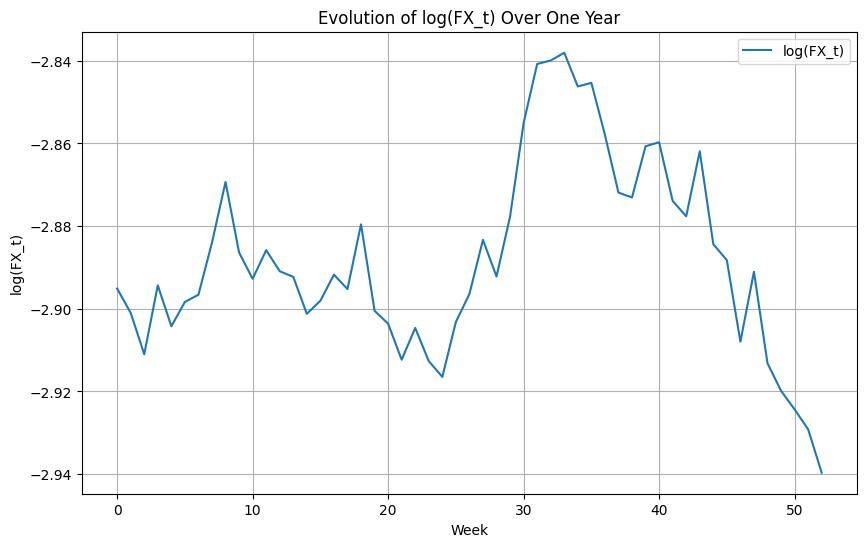

In [18]:
# Simulation of one path of X_t over one year
np.random.seed(42)  # for reproducibility
X = np.zeros((T+1, len(X0)))
X[0] = X0

for t in range(1, T+1):
    dX = np.random.multivariate_normal(mean=mu, cov=Sigma)
    X[t] = X[t-1] + dX

# Extract log(FX_t) and plot its evolution
log_FX_series = X[:, 0]
plt.figure(figsize=(10,6))
plt.plot(range(T+1), log_FX_series, label='log(FX_t)')
plt.xlabel('Week')
plt.ylabel('log(FX_t)')
plt.title('Evolution of log(FX_t) Over One Year')
plt.grid(True)
plt.legend()
plt.show()

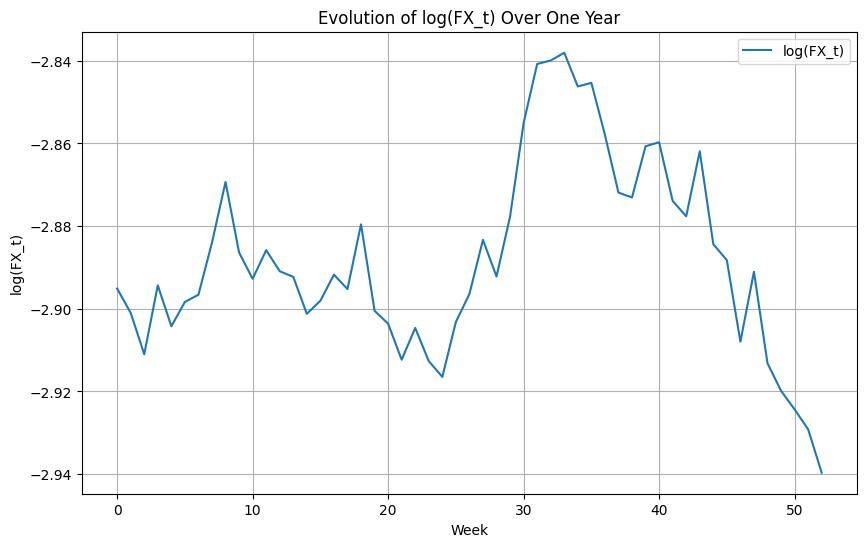

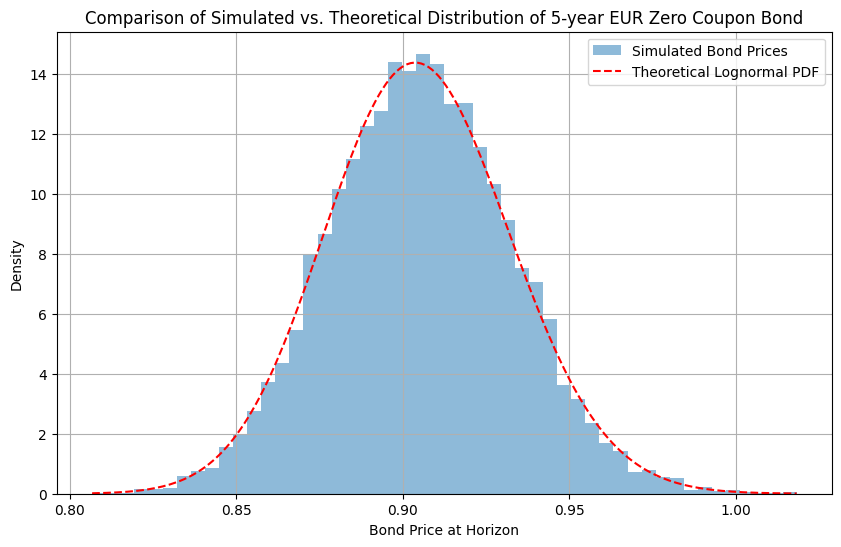

In [ ]:
# Convert fx_spot to log, as we assume prices and FX are modeled in log-terms
X0[0] = np.log(X0[0])  # log(FX)


covariance_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)

# Ensure that covariance_matrix's rows and columns match var_names
# If they do not match exactly, you can reorder:
covariance_matrix = covariance_matrix.loc[var_names, var_names]

Sigma = covariance_matrix.values

# Set up parameters for simulation
dt = 1/52
T = 52  # number of weeks in a year
mu = np.zeros(len(X0))
mu[1] = 0.07 * dt
mu[2] = 0.06 * dt

# Identify the index of the 5-year EUR yield
idx_5y_eur = np.where(var_names == "5Y EUR")[0][0]

# Simulation of one path of X_t over one year
np.random.seed(42)  # for reproducibility
X = np.zeros((T+1, len(X0)))
X[0] = X0

for t in range(1, T+1):
    dX = np.random.multivariate_normal(mean=mu, cov=Sigma)
    X[t] = X[t-1] + dX

# Extract log(FX_t) and plot its evolution
log_FX_series = X[:, 0]
plt.figure(figsize=(10,6))
plt.plot(range(T+1), log_FX_series, label='log(FX_t)')
plt.xlabel('Week')
plt.ylabel('log(FX_t)')
plt.title('Evolution of log(FX_t) Over One Year')
plt.grid(True)
plt.legend()
plt.show()

# Distribution of X_1:
# At t=1 (one week later), X_1 is normally distributed with mean X_0+mu and covariance Sigma.
# For a large number of simulations, we can verify this distribution.
N_sims = 10000
final_X_samples = np.zeros((N_sims, len(X0)))
for i in range(N_sims):
    dX = np.random.multivariate_normal(mean=mu, cov=Sigma)
    final_X_samples[i] = X0 + dX

# For demonstration, let's focus on the distribution of V_t^{US,local} (index 1)
# It's normal with mean X0[1]+mu[1], variance Sigma[1,1]
mean_US = X0[1] + mu[1]
var_US = Sigma[1,1]
std_US = np.sqrt(var_US)

# Now, focusing on the 5-year EUR zero coupon bond at the horizon:
# Horizon T = 1 year (52 weeks)
# After T steps, the yield y_{T,EUR,5y} is normal: y_{T,EUR,5y} ~ N(y0_5y_eur + T*mu_y, T*sigma_y^2)
# Where mu_y = mu[idx_5y_eur] (which is zero), and sigma_y^2 = Sigma[idx_5y_eur, idx_5y_eur].


# The 5-year zero coupon bond y0_5y_eur = X0[idx_5y_eur]
mu_y = mu[idx_5y_eur]  # should be 0 for yields
sigma_y = np.sqrt(Sigma[idx_5y_eur, idx_5y_eur])
m = y0_5y_eur + T * mu_y
s = np.sqrt(T) * sigma_yprice at the horizon (one year later) is:
# P = exp(-5 * y_{T,EUR,5y})
# If Y ~ N(m, s^2), then -5Y ~ N(-5m, 25 s^2), so P is lognormal.
N_sims_bond = 10000
final_yields = np.zeros(N_sims_bond)
for i in range(N_sims_bond):
    # simulate T increments for the yield only
    dX_path = np.random.multivariate_normal(mu, Sigma, size=T)
    final_yields[i] = y0_5y_eur + np.sum(dX_path[:, idx_5y_eur])

final_bond_prices = np.exp(-5 * final_yields)

# Compare simulated distribution to theoretical lognormal
mu_P = -5 * m
sigma_P = 5 * s

plt.figure(figsize=(10,6))
counts, bins, _ = plt.hist(final_bond_prices, bins=50, density=True, alpha=0.5, label='Simulated Bond Prices')
x = np.linspace(min(final_bond_prices), max(final_bond_prices), 200)
theoretical_pdf = lognorm.pdf(x, s=sigma_P, scale=np.exp(mu_P))
plt.plot(x, theoretical_pdf, 'r--', label='Theoretical Lognormal PDF')

plt.xlabel('Bond Price at Horizon')
plt.ylabel('Density')
plt.title('Comparison of Simulated vs. Theoretical Distribution of 5-year EUR Zero Coupon Bond')
plt.legend()
plt.grid(True)
plt.show()


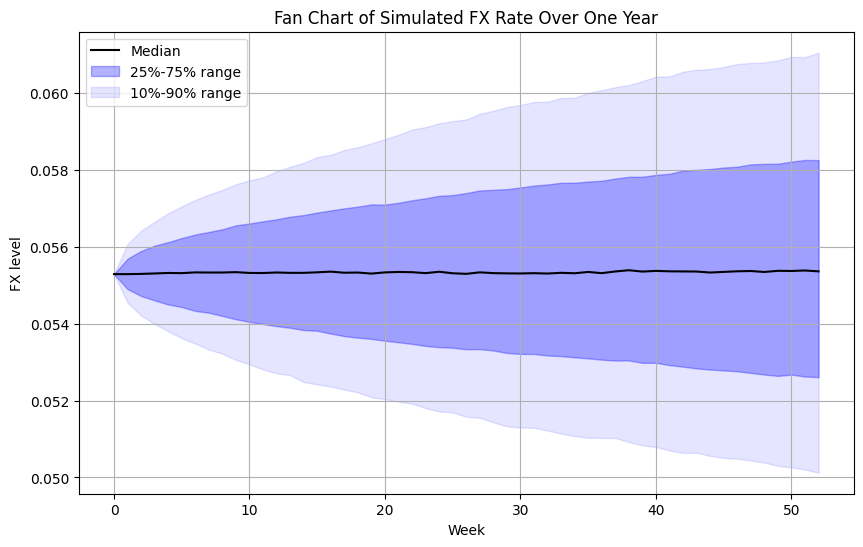

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load initial values
init_values = pd.read_excel("init_values.xlsx", index_col=0)
X0_vals = init_values["initial values"].values
var_names = init_values.index.values
X0 = X0_vals.astype(float)

# Convert fx_spot to log
X0[0] = np.log(X0[0])

# Load covariance matrix
covariance_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)
covariance_matrix = covariance_matrix.loc[var_names, var_names]
Sigma = covariance_matrix.values

# Define time and increments
T = 52  # one year in weeks
dt = 1/52

# Mean vector μ as per the problem statement
mu = np.zeros(len(X0))
# FX increments: index 0 - no drift mentioned, we keep as zero
# EQV US (index 1) has drift 0.07 * dt
mu[1] = 0.07 * dt
# EQV EUR (index 2) has drift 0.06 * dt
mu[2] = 0.06 * dt
# yields have zero drift

# Number of simulations for the fan chart
N_sims = 10000

# We will focus on the FX rate for the fan chart
# That's the first element in our state vector.
# After simulation, we will exponentiate it to get back the FX level.
all_paths = np.zeros((N_sims, T+1))
all_paths[:,0] = np.exp(X0[0])  # initial FX level

# Simulate all paths
np.random.seed(42)  # for reproducibility
for i in range(N_sims):
    X = X0.copy()
    path = np.zeros(T+1)
    path[0] = np.exp(X[0])  # store FX at t=0
    for t in range(1, T+1):
        dX = np.random.multivariate_normal(mu, Sigma)
        X += dX
        path[t] = np.exp(X[0])  # FX is first element, exponentiate back
    all_paths[i,:] = path

# Now we have N_sims paths of FX over 52 weeks.
# Compute quantiles at each time step
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]  # You can choose your own set of quantiles
quantile_values = np.percentile(all_paths, [q*100 for q in quantiles], axis=0)

# quantile_values is now a 2D array: rows = quantiles, columns = time steps
# Example:
# quantile_values[0] = 10th percentile across time
# quantile_values[1] = 25th percentile across time
# quantile_values[2] = 50th percentile (median)
# quantile_values[3] = 75th percentile
# quantile_values[4] = 90th percentile

weeks = np.arange(T+1)

# Plot the fan chart
plt.figure(figsize=(10,6))

# The median line
plt.plot(weeks, quantile_values[2], color='black', label='Median')

# Fill between 25th and 75th percentile
plt.fill_between(weeks, quantile_values[1], quantile_values[3], color='blue', alpha=0.3, label='25%-75% range')

# Fill between 10th and 90th percentile
plt.fill_between(weeks, quantile_values[0], quantile_values[4], color='blue', alpha=0.1, label='10%-90% range')

plt.xlabel('Week')
plt.ylabel('FX level')
plt.title('Fan Chart of Simulated FX Rate Over One Year')
plt.grid(True)
plt.legend()
plt.show()


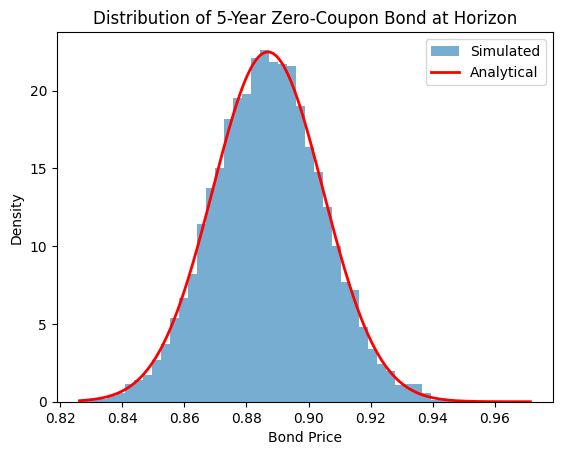

Simulated Mean: 0.8870
Analytical Mean: 0.8869
Simulated Variance: 0.0003
Analytical Variance: 0.0003


In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example Yield Curve Data (from attached files)
maturities = np.array([1, 3, 5, 7, 10])  # Example maturities
yields = np.array([0.02, 0.025, 0.03, 0.035, 0.04])  # Example yields for EUR zero-coupon bonds

# Interpolator for yields
interpolator = interp1d(maturities, yields, kind='linear', fill_value="extrapolate")

# Initial settings for 5-year zero-coupon bond
T_initial = 5
y_T_initial = interpolator(T_initial)  # Yield for 5 years
Z_initial = np.exp(-y_T_initial * T_initial)  # Price of 5-year bond at t=0

# Simulation Parameters
time_horizon = 1  # 1 year
T_horizon = T_initial - time_horizon
num_simulations = 10000
mu_yield_change = 0  # Assumed mean change in yield
sigma_yield_change = 0.005  # Standard deviation of yield changes (example)

# Simulating changes in yields
yield_changes = np.random.normal(mu_yield_change, sigma_yield_change, size=num_simulations)

# Yields at the horizon
y_T_horizon = y_T_initial + yield_changes
Z_horizon = np.exp(-y_T_horizon * T_horizon)  # Bond prices at the horizon

# Analytical Distribution of Zero-Coupon Bond Prices
mean_yield_horizon = y_T_initial  # Assuming zero drift in yields
var_yield_horizon = sigma_yield_change**2
mean_Z_horizon = np.exp(-mean_yield_horizon * T_horizon)
var_Z_horizon = mean_Z_horizon**2 * (np.exp(var_yield_horizon * T_horizon**2) - 1)

# Visualization: Simulated vs Analytical Distribution
x_values = np.linspace(Z_horizon.min(), Z_horizon.max(), 500)
pdf_values = norm.pdf(x_values, loc=mean_Z_horizon, scale=np.sqrt(var_Z_horizon))

plt.hist(Z_horizon, bins=50, density=True, alpha=0.6, label="Simulated")
plt.plot(x_values, pdf_values, label="Analytical", color="red", lw=2)
plt.title("Distribution of 5-Year Zero-Coupon Bond at Horizon")
plt.xlabel("Bond Price")
plt.ylabel("Density")
plt.legend()
plt.show()

# Print Comparisons
print(f"Simulated Mean: {np.mean(Z_horizon):.4f}")
print(f"Analytical Mean: {mean_Z_horizon:.4f}")
print(f"Simulated Variance: {np.var(Z_horizon):.4f}")
print(f"Analytical Variance: {var_Z_horizon:.4f}")

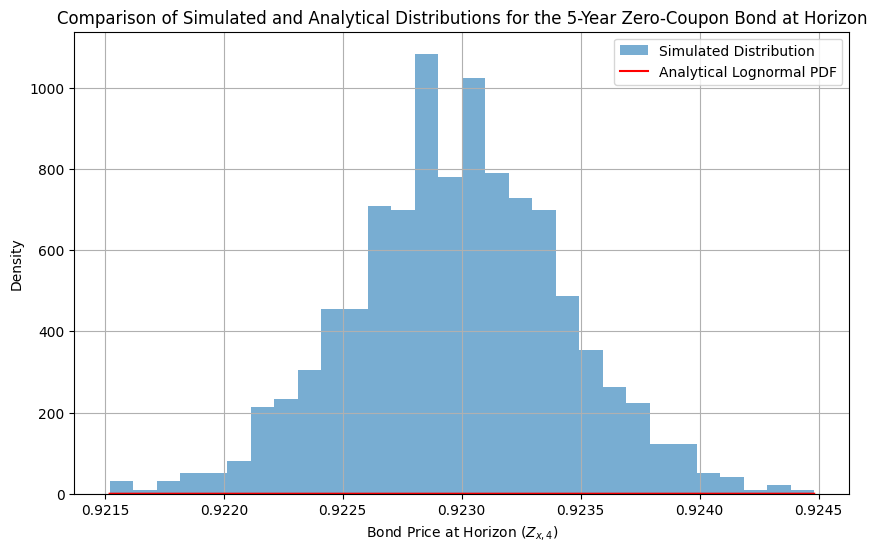

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Load initial values and covariance matrix
init_values = pd.read_excel("init_values.xlsx", index_col=0)
cov_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)

# Extract initial yield for the 5-year EUR zero-coupon bond
y0_5_EUR = init_values.loc["5Y EUR"].values[0]
tau_5 = 5  # Initial maturity
tau_4 = 4  # Horizon maturity

# Define parameters for simulation
sigma_5_EUR = cov_matrix.loc["5Y EUR", "5Y EUR"]  # Variance for 5Y EUR yield
delta_t = 1 / 52  # Weekly time step (1 year = 52 weeks)

# Simulate the evolution of the 5Y EUR zero-coupon bond at horizon
num_simulations = 1000  # Number of Monte Carlo paths
delta_y_4 = np.random.normal(loc=0, scale=np.sqrt(sigma_5_EUR * delta_t), size=num_simulations)
y1_4_EUR = y0_5_EUR + delta_y_4  # Horizon yield (4Y)

# Calculate bond price at horizon
Z1_4_EUR_simulated = np.exp(-y1_4_EUR * tau_4)

# Analytical lognormal distribution parameters
mu_log = -y0_5_EUR * tau_5
sigma_log = np.sqrt(sigma_5_EUR * delta_t * tau_4**2)

# Generate analytical lognormal distribution for comparison
x = np.linspace(min(Z1_4_EUR_simulated), max(Z1_4_EUR_simulated), 10000)
pdf_analytical = lognorm.pdf(x, s=sigma_log, scale=np.exp(mu_log))

# Plot the simulated and analytical distributions
plt.figure(figsize=(10, 6))
plt.hist(Z1_4_EUR_simulated, bins=30, density=True, alpha=0.6, label="Simulated Distribution")
plt.plot(x, pdf_analytical, 'r-', label="Analytical Lognormal PDF")
plt.title("Comparison of Simulated and Analytical Distributions for the 5-Year Zero-Coupon Bond at Horizon")
plt.xlabel("Bond Price at Horizon ($Z_{x,4}$)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()
